### Student Name: Vipul Popat
### Student ID: 18195121

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./Task4.csv')

df.head(5)

,X,y
0,0.0000,-0.3080
1,0.0101,-0.3470
2,0.0202,-0.0937
3,0.0303,-0.2860
4,0.0404,-0.0927


In [3]:
X = df['X'].values
y = df['y'].values


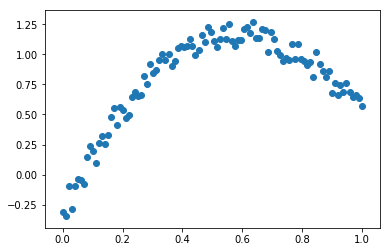

In [4]:
plt.scatter(X, y)

# Task 4  (CE6002)
#### *Copy your linear classification algorithm to the notebook Etivity3_LinearRegression.ipynb available in the git repository. Change your linear classification algorithm to make it suitable for linear regression. Use this to obtain the best possible classification of the data set Task4.csv. Your classification performance should improve if you add some new features.*
  

In [5]:
class LearningAlgorithm(object):
    """ 
    Parameters
    ------------
    rate : float
        Learning rate (ranging from 0.0 to 1.0)
    number_of_iteration : int
        Number of iterations over the input dataset.

    Attributes:
    ------------

    coef_ : 1d-array
        Weights after fitting.

    errors  : model error
        Number of misclassification in every epoch(one full training cycle on the training set)

    """

    def fit(self, X, y):
        X_inverse = np.linalg.pinv(X)
        w_lin = np.matmul(X_inverse, y)
        self.coef_ = w_lin

    def dot_product(self, X):
        """ Calculate the dot product """
        return (np.dot(X, np.transpose(self.coef_)))

    def predictClass(self, X):
        """ Predicting the label for the input data """
        return np.sign(self.dot_product(X)) 
    

    def predict(self, X):
        """ Predicting the label for the input data """
        return self.dot_product(X)
    
def calc_mean_square_error(orig, calc):
    e_sq = 0
    N = len(orig)
    for i in range(N):
        e_sq += math.pow((orig[i] - calc[i]),2)
    return math.sqrt(e_sq/N)

# thanks to michel danjou for this method
def calc_polynom(weights, X):
    h = weights[0]
    for i in np.arange(1, len(weights)):
        h += weights[i]*X ** i    
    return h 
    
def plot_data_and_algorithm(X, y, alg, title):
    test_train_ratio = 0.2
    X_shuffled, y_shuffled = shuffle(X, y, random_state=0)
    X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=test_train_ratio, random_state=0)
    
    alg.fit(X_train, y_train)

    minx = np.amin(X_train)
    maxx = np.amax(X_train)
    s = len(X[:,1])
    x_line = np.linspace(minx, maxx, s)
    y_line = calc_polynom(alg.coef_, x_line)
    plt.title(title)
    plt.plot(x_line, y_line)

    
    y_out = alg.predict(X_test)
    error_mse = calc_mean_square_error(y_out, y_test)
    print("Error = ",error_mse)
    plt.scatter(X[:,1], y, c=y)
    
    # printing the results away from the actual data so that we are able to identify the test/train data correctly
    plt.scatter(X_test[:,1], np.sign(y_out)*2, c=y_test)
    
def decision_boundary_lin(weights, x_min, x_max):
   # Return two points on the decision boundary
   return [point_on_boundary_lin(weights, x_min), point_on_boundary_lin(weights, x_max)]

def point_on_boundary_lin(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2] 


Error =  0.33999752513905723


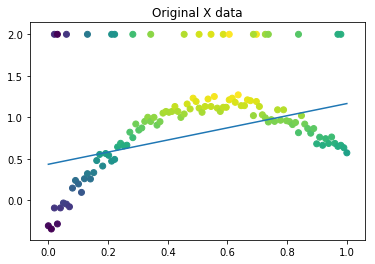

In [6]:
bias = np.ones(len(X))
X_input =  np.c_[bias,X]

p = LearningAlgorithm()
plot_data_and_algorithm(X_input, y.T, p, 'Original X data')

The error rate calculated is around 34%

Error =  0.40569416159926625


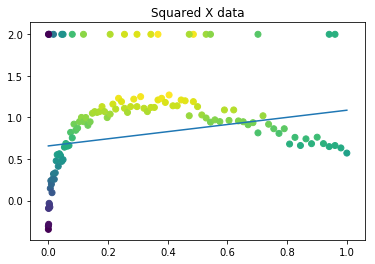

In [7]:
X_sq = np.square(X)

bias = np.ones(len(X))
X_input =  np.c_[bias,X_sq]

p_sq = LearningAlgorithm()
plot_data_and_algorithm(X_input, y.T, p_sq, 'Squared X data')

Error =  0.08920587191120377


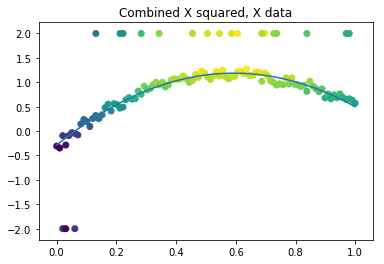

In [8]:
X_input =  np.c_[bias,X, X_sq]

p_sq_combined = LearningAlgorithm()
plot_data_and_algorithm(X_input, y.T, p_sq_combined, 'Combined X squared, X data')

Error =  0.08375752472421742


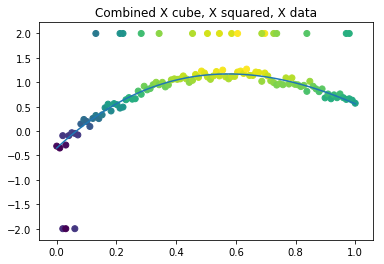

In [9]:
# Cube the input data
X_cube = np.power(X, 3)
X_input =  np.c_[bias,X, X_sq, X_cube]

p_all = LearningAlgorithm()
plot_data_and_algorithm(X_input, y.T, p_all, 'Combined X cube, X squared, X data')

It clearly appears from the plots and error is **minimal** when we use the feature of combined X and X square and X cube. If we use the X or X square, the error is very high

#### C. Use an algorithm from the scikit-learn toolbox to see if you can do better

Note: You should not add any other imports than those necessary for your chosen scikit-learn algorithm.

Reference: 
1. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
2. https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

#### Scikit-learn Linear Regression:

R_square score of the model: 0.4645382880058122


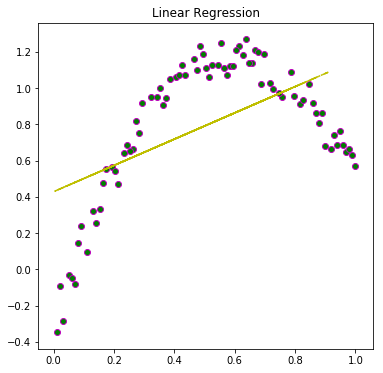

In [10]:
from sklearn.linear_model import LinearRegression

X_input = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_input, y, test_size=0.2, random_state=42)

lr = LinearRegression()
model = lr.fit(X_train, y_train)

predictions = lr.predict(X_test)
score = model.score(X_test, y_test)

# Plot the regression curve
plt.figure(figsize=(6, 6))
plt.scatter(X_train, y_train, c='g', edgecolors='m')
plt.plot(X_test, predictions, 'y-.')

print('R_square score of the model:', score)
plt.title('Linear Regression')
plt.show()

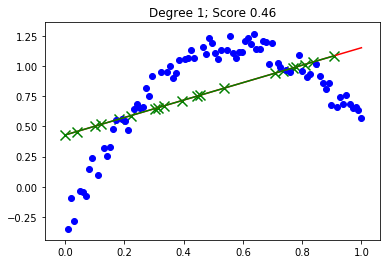

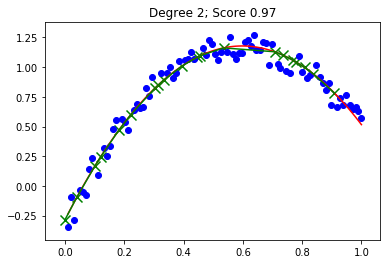

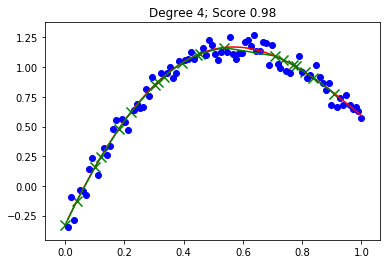

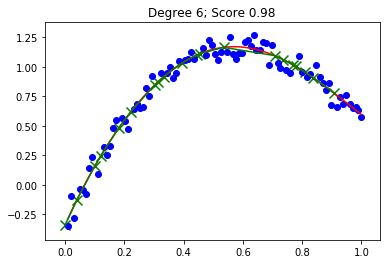

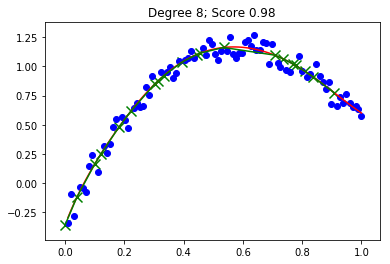

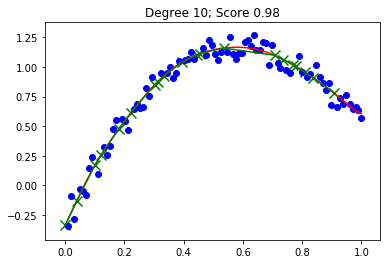

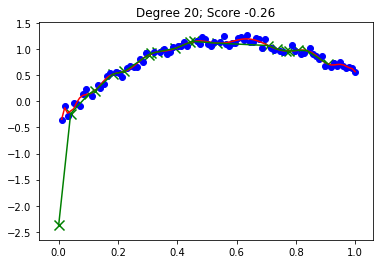

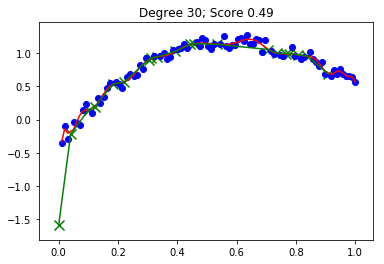

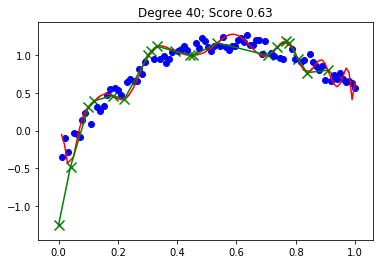

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

degrees = [1, 2, 4, 6, 8, 10, 20, 30, 40]

# Thanks to Michel Danjou for the way he did the visulalization of various degrees. I did copy a few bits here
# and there to get the visualizations done
X_train, X_test, y_train, y_test = train_test_split(X_input, y, test_size=0.2, random_state=42)
rmse = []

for i in range(len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=True)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train, y_train)
    
    predictions = pipeline.predict(X_test)
    pred_train = pipeline.predict(X_train)
    score = pipeline.score(X_test, y_test)
    
    rmse.append(calc_mean_square_error(y_test, predictions))
    
    new_X_train, new_y_train = zip(*sorted(zip(X_train, pred_train))) # sort values for plotting
    new_X_test, new_y_test = zip(*sorted(zip(X_test, predictions))) # sort values for plotting

    # plot training data
    plt.plot(new_X_train, new_y_train, c='red')

    # plot testing data (draw a curve, then add X markers for each testing sample)
    plt.plot(new_X_test, new_y_test, c='green')
    plt.scatter(new_X_test, new_y_test, marker='x', s=100, c="green")

    # plot original data
    plt.scatter(X_train, y_train, c='blue')

    plt.title("Degree {}; Score {:.2f}".format(degrees[i], score))
    plt.show()


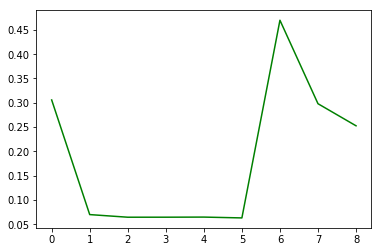

In [29]:
# Plot errors
#degrees = [1, 2, 4, 6, 8, 10, 20, 30, 40]
## TODO need to figure out how do i show the relevant degress on the xaxis
degrees = np.linspace(0, 8, 9)
plt.plot(degrees, rmse, c='green')
plt.show()

**RESULTS**: 
  * The RMSE is calculated on the test data.
  * From the error graph above and the degrees plots, it feels like higher the degree of polynomial, higher is the overfitting of the model.

##### Observations
  * For the first two degree i.e. 1 and 2, the model appears to be very simple and has high error and appears to be underfitting
  * The lowest error is within the 2 - 10 degree polynomials and after that it seems to rise to a very high error.
  * The error increases above the polynomial degree of 10 where it seems to be like **overfitting** based on the plots